# Titanic Survival Prediction

The goal of this project is to use machine learning to determine which passengers survive the Titanic shipwreck

In [1]:
# import libraries
import pandas as pd

# read data
data = pd.read_csv("titanic_data/train.csv")

# check the dimension of the table
print("The dimension of the table is: ", data.shape)

# show first 5 rows of the table
print(data.head())

The dimension of the table is:  (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

There are 12 columns for this dataset. Here is a list of the name and defining details.

+ PassengerID
+ Survived - Survival (0 = No, 1 = Yes)
+ Pclass - Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)
+ Name
+ Sex - Sex
+ Age - Age in years
+ SibSp - # of siblings/ spouses aboard the Titanic
+ Parch - # of parents / children aboard the Titanic
+ Ticket - Ticket number
+ Fare - Passenger fare
+ Cabin - Cabin number
+ Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Current Questions about the data

1. What do the variables look like?
2. What value type are the variables?
3. Are the numerical variables correlated?
4. Are the distributions of numerical variables the same or different among survived and not survived?
5. Is the survival rate different for different values?
6. Are there different survival rates in different categories?

### What do the variables Look Like?

In [2]:
# Display details on numeric values
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above displays some details regarding the numerical values in the data.

One thing to take note is that there are missing values in age. The total count is 891, but age only ha 714.

Now looking at details for non-numeric values

In [3]:
# Display details on non-numeric values
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. Harold Victor",male,CA. 2343,G6,S
freq,1,577,7,4,644


So for cabin, there are only 204 counted and 147 unique. This means some people are sharing cabines and there are missing values for cabin assignments. Looking at the previous results it is confirmed that there are missing values.  So how many total cabins were available on the Titanic?

Tickets have 681 unique values, why is that.

Embark appears to be missing some values as well.

### Visualizations of the Data

"PassengerID", "Survived" and "Pclass" are categorical data so they will not be used to plot the histogram.

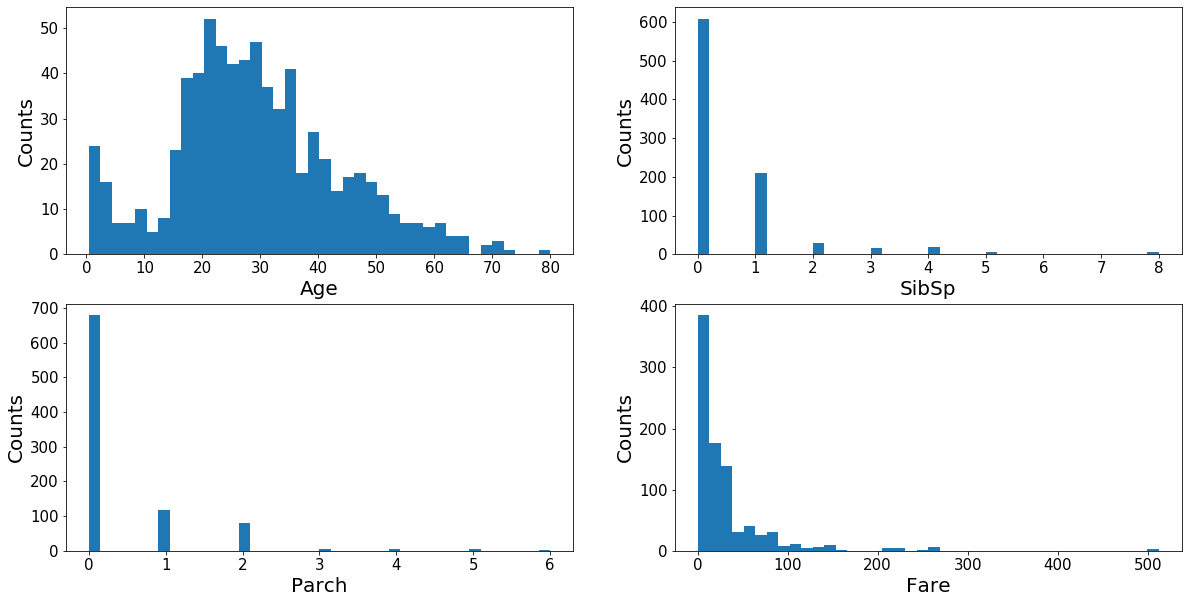

In [4]:
# import visualization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

The data values appear to be in the correct range. A majority of the passengers are between he ages of 20 and 40 years old. They don't have siblings or other children with them and a majority of the tickets were purchased below $50 with very few purchased for over $500.

Next is a barplot of categorical data. "Ticket" and "Cabin" will be omitted for having too many levels.

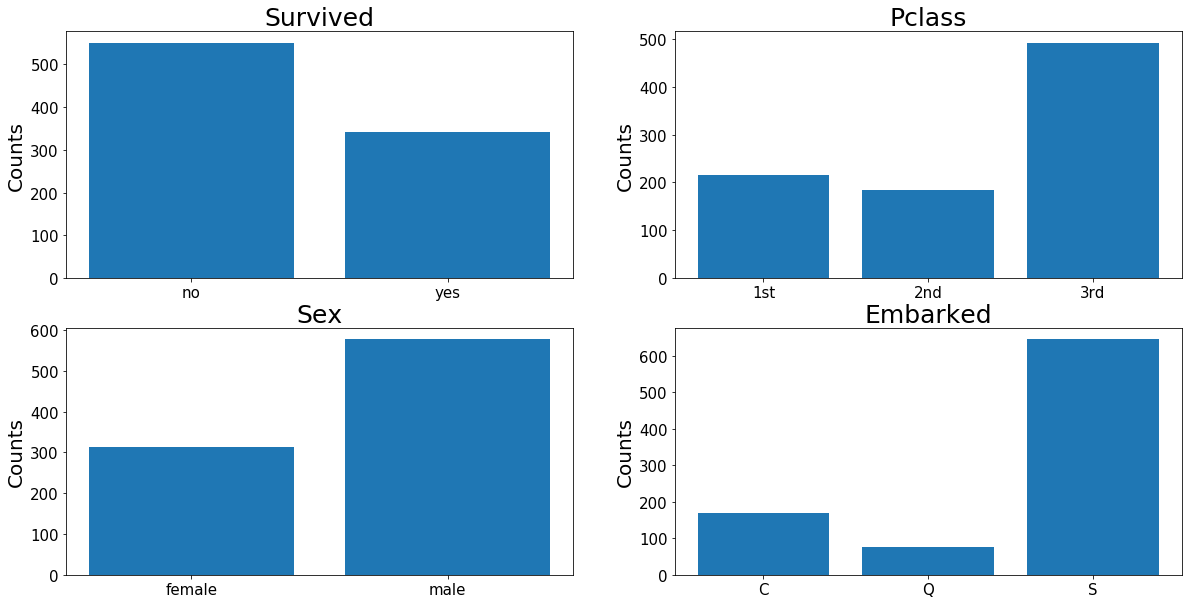

In [5]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visualizer
X_Survived = data.replace({'Survived': {1:'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1:'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to fee into the visualizer
X_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

Next we will determine if numerical variables are correlated, using the Pearson Ranking visualization.

C:\Users\kdenn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


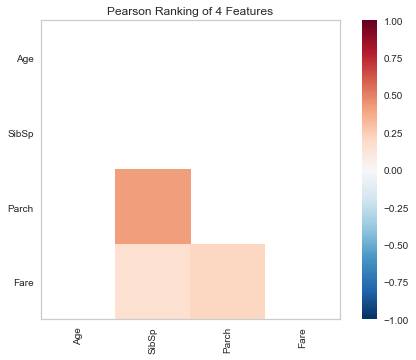

In [6]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)

# import the package for visualization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].values

# instatiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

Are the distribution of numerical variables, the same or different among survived and not survived?

This will compare the distribution of numerical variables between passengers that survived and thos that did not survive.

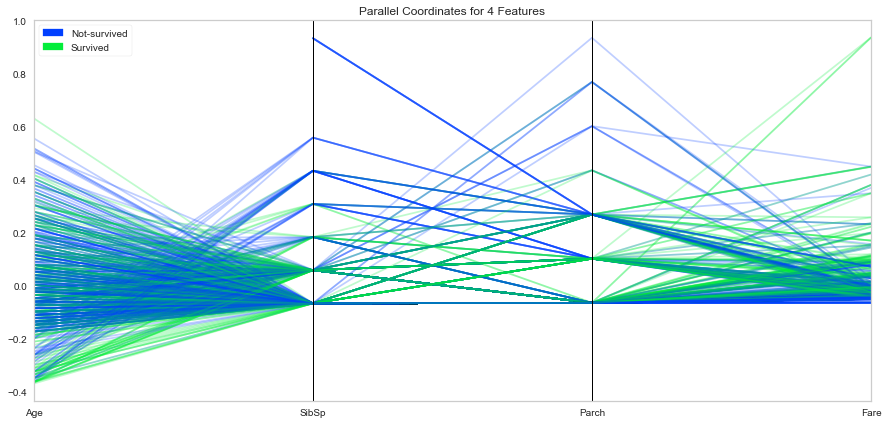

In [7]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Survived.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

Are the survival rates different for different categories?

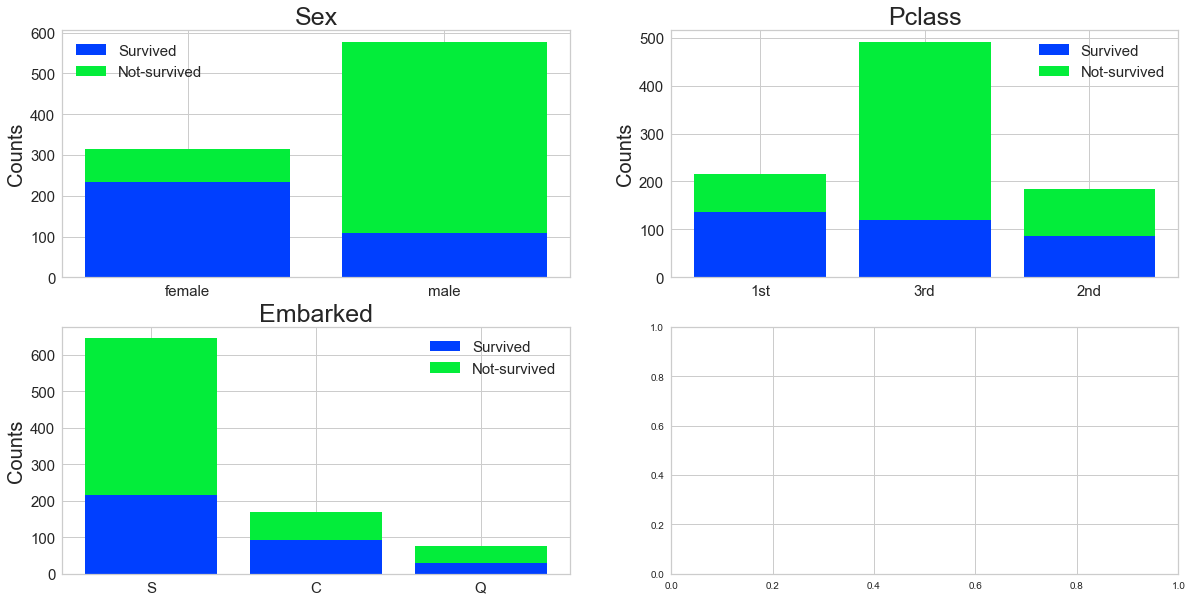

In [8]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visualizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}) [data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1:'Survived', 0: 'Not-survived'}}) [data['Survived']==0]['Sex'].value_counts()

Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)

# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)

axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()

Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom = Pclass_survived.values)

axes[0, 1].set_title('Pclass', fontsize = 25)
axes[0, 1].set_ylabel('Counts', fontsize = 20)
axes[0, 1].tick_params(axis = 'both', labelsize = 15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}) [data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}) [data['Survived']==0] ['Embarked'].value_counts()

Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

# make the bar plot
p5 = axes[1 ,0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)

axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize=15)


### Feature Engineering

Features to Drop:
1. "PassengerId": This is just a series of numbers from 1-891 used to label the passengers

2. "Name": This might give some information regarding the passengers that are related. It's being removed for simplicity sake.

3. "Ticket" and "Cabin": There are too many levels with unknown information

Filling in Missing Values:

There are missing values in "Age", "Cabin" and "Embarked". The "Cabin" feature will not be used so the missing values don't matter. 

Missing "Age" values will be filled with the median age and missing "Embarked" values will be replaced with "S", because it is the most represented value in the dataset.

In [9]:
# fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])

# check the result
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

# check the result
data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

### Log Transformation of "Fare"

An observation from the histograms, shows that "Fare" is very right-skewed. Using a log-transformation will reduce the skew.

In [11]:
# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

# check the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


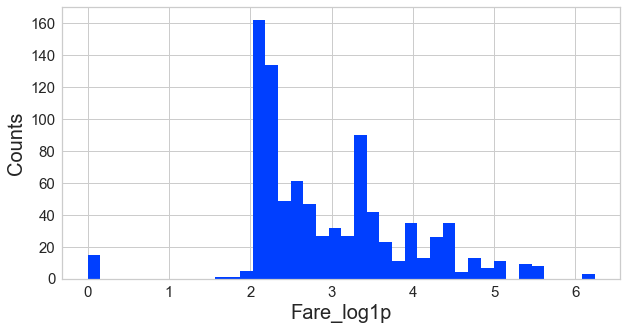

In [12]:
# check the distribution using a histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

### One Hot Encoding For Categorical Features

One hot encoding will be done on categorical features to transform them into numbers.

In [13]:
# get the categorical data
cat_features = ['Pclass', 'Sex', 'Embarked']
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1:'1st', 2:'2nd', 3:'3rd'}})

# One Hot Encoding
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


### Setup Data for Model Training and Evaluation

Splitting the data up into a training and validation data sets.

In [18]:
# create a whole feature dataset that can be used for train
# and validation data splitting
# dummy features and numerical features will be combined.
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']

data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train
# and validation data splitting
data_model_y = data.replace({'Survived': {1:'Survived', 0: 'Not_survived'}})['Survived']


In [20]:
# separate data into training and validation then check the 
# the details of the datasets

# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size = 0.3, random_state = 11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set: ", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survivd and not-survived in the training set: ')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set: ')
print(y_val.value_counts())

No. of samples in training set:  623
No. of samples in validation set:  268


No. of survivd and not-survived in the training set: 
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set: 
Not_survived    176
Survived         92
Name: Survived, dtype: int64


### Model Training and Evaluation Visualization

Predicting if a passenger has survived or not makes this a classification problem.

C:\Users\kdenn\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\kdenn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


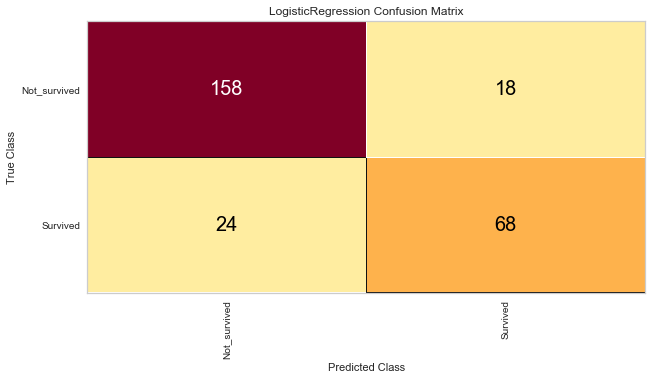

In [22]:
# Confusion matrix with Yellowbrick
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model
model = LogisticRegression()

# The Confusion Matrix visualizer taxes a model
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit fits the passed model. This is unnecessary if 
# you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the confusion matrix, we need some test
# data. Score runs predict() on the data and then 
# creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
# Check Work
cm.poof()

### Precision, Recall and F1 Score

Visually generated classification report

C:\Users\kdenn\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


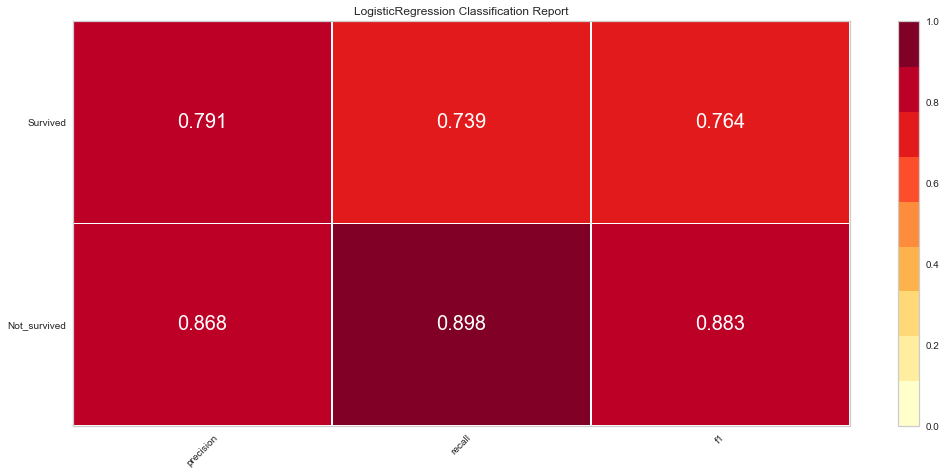

In [23]:
# set the size of the figure and the font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw/show/poof the data
g = visualizer.poof()

C:\Users\kdenn\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


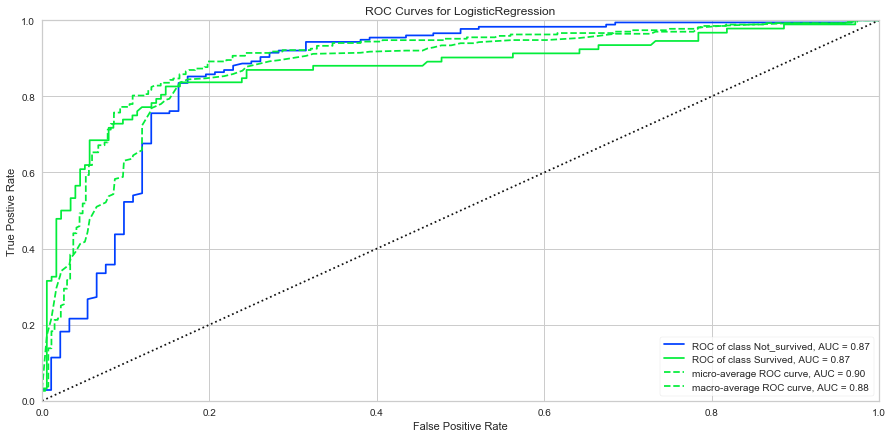

In [24]:
# Instantiate the visualizer for the ROC Curve
visualizer = ROCAUC(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw/show/poof the data
g = visualizer.poof()

### Conclusion

This tutorial contained many different ways to visually represent data, but lacked in other areas. Creating all the graphs is extremely helpful when it comes to developing a data science report, however more than one algorithm should have been used to train and test the model. 

Some of the coding methods seem to be out of date too. For instance. as_matrix() is not supported anymore so you have to replace it with .values and get_params is almost no longer supported. I still need to figureo ut how to solve that issue.